K=1 Accuracy: 0.97
K=2 Accuracy: 1.00
K=3 Accuracy: 1.00
K=4 Accuracy: 1.00
K=5 Accuracy: 1.00
K=6 Accuracy: 1.00
K=7 Accuracy: 1.00
K=8 Accuracy: 1.00
K=9 Accuracy: 1.00
K=10 Accuracy: 1.00


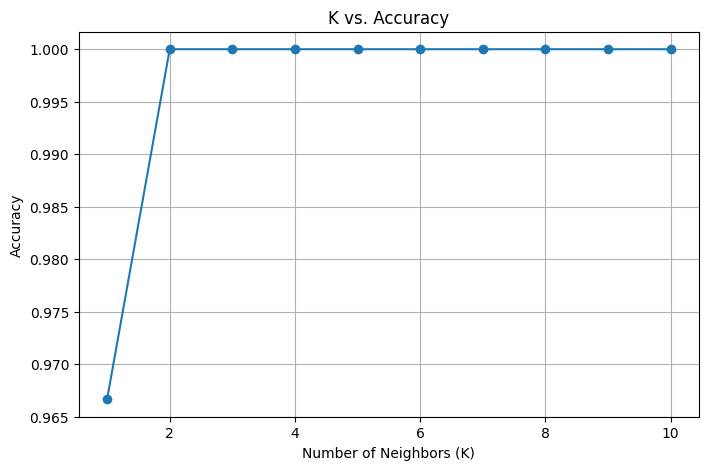


Best K = 2
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



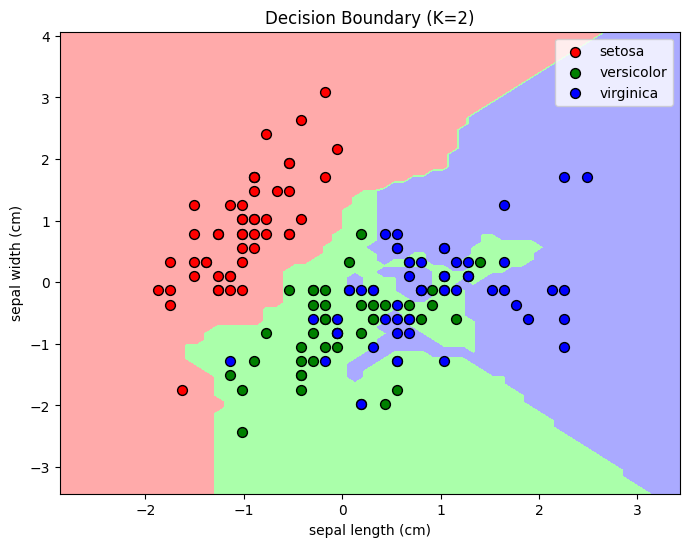

In [1]:
# Task 6: K-Nearest Neighbors Classification using Iris Dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different values of K and record accuracy
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} Accuracy: {acc:.2f}")

# Plot accuracy vs. K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("K vs. Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Final model with best K (manually pick or use max)
best_k = k_values[accuracies.index(max(accuracies))]
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)

# Evaluation
print(f"\nBest K = {best_k}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))
print("Classification Report:\n", classification_report(y_test, y_final_pred, target_names=target_names))

# Optional: Visualize decision boundary using only 2 features
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # take only 2 features for visualization
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

clf_vis = KNeighborsClassifier(n_neighbors=best_k)
clf_vis.fit(X_vis_train, y_vis_train)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
for idx, color in enumerate(cmap_bold):
    plt.scatter(X_vis[:, 0][y == idx], X_vis[:, 1][y == idx],
                label=iris.target_names[idx], c=color, edgecolor='k', s=50)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Decision Boundary (K={best_k})")
plt.legend()
plt.show()
